In [ ]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [ ]:
TRAIN_DIR='images/train'
TEST_DIR='images/test'

In [ ]:
def createdataframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels    
        

In [ ]:
train=pd.DataFrame()
train['image'],train['label']=createdataframe(TRAIN_DIR)

In [ ]:
print(train)

In [ ]:
test=pd.DataFrame()
test['image'],test['label']=createdataframe(TEST_DIR)

In [ ]:
print(test)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
        
        

In [ ]:
train_features = extract_features(train['image']) 


In [ ]:
test_features=extract_features(test['image'])

In [ ]:
x_train=train_features/255.0
x_test=test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
le.fit(train['label'])

In [ ]:
y_train=le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 653s 3s/step - accuracy: 0.6585 - loss: 0.9031 - val_accuracy: 0.6183 - val_loss: 1.0252
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.6742 - loss: 0.8832 - val_accuracy: 0.6165 - val_loss: 1.0310
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.6692 - loss: 0.8884 - val_accuracy: 0.6241 - val_loss: 1.0238
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.6636 - loss: 0.8981 - val_accuracy: 0.6202 - val_loss: 1.0426
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.6753 - loss: 0.8800 - val_accuracy: 0.6194 - val_loss: 1.0391
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.6713 - loss: 0.8827 - val_accuracy: 0.6183 - val_loss: 1.0256
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.6792 - loss: 0.8640 - val_accuracy: 0.6206 - val_loss: 1.0271
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.6832 - loss: 0.8620 - 

KeyboardInterrupt: 

In [40]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [41]:
from keras.models import model_from_json

In [42]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [43]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [45]:
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [46]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
model prediction is  sad


In [49]:

import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
model prediction is  sad


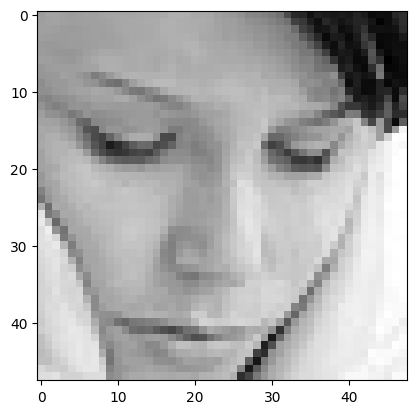

In [50]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
model prediction is  fear


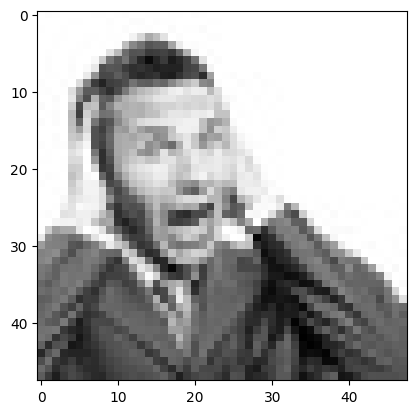

In [51]:
image = 'images/train/fear/17.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
model prediction is  disgust


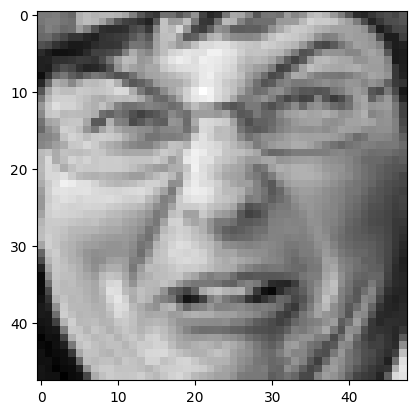

In [52]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
model prediction is  happy


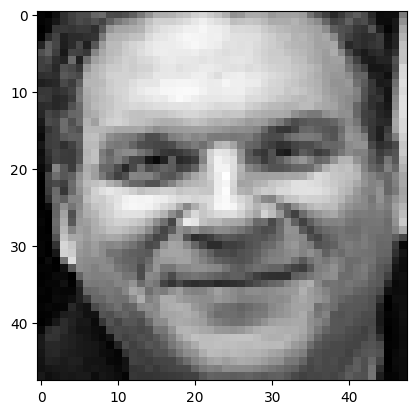

In [53]:
image = 'images/train/happy/14.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
model prediction is  surprise


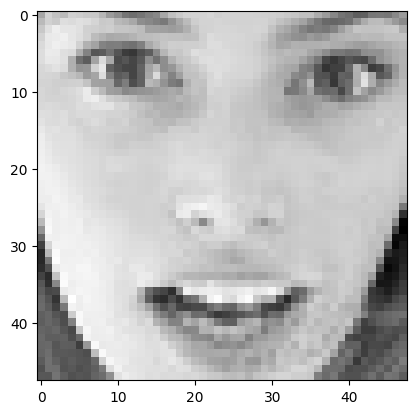

In [54]:
image = 'images/train/surprise/26.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
model prediction is  sad


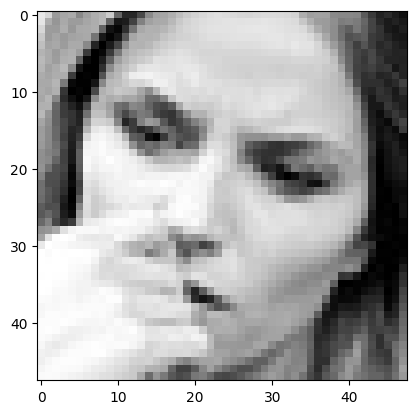

In [55]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
model prediction is  surprise


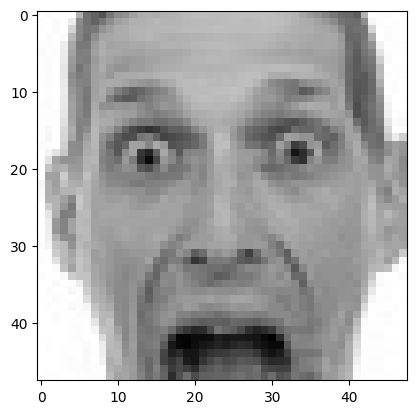

In [56]:
image = 'images/train/fear/9.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
model prediction is  fear


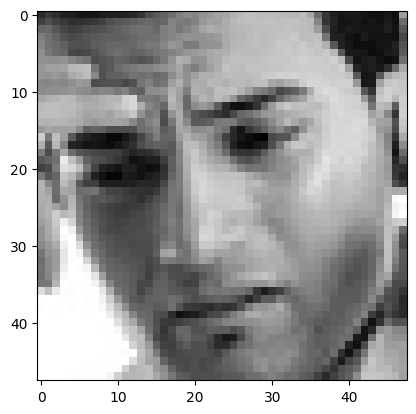

In [57]:
image = 'images/train/fear/84.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
model prediction is  fear


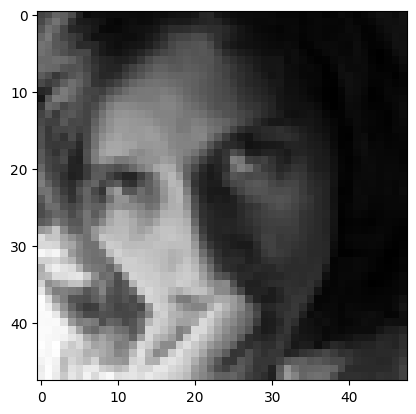

In [58]:
image = 'images/train/fear/95.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')